## <font color=AF3E3E> Análisis para la Venta de Tienda 📊
---

# Importación de datos



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [18]:
# Añadir columna identificadora para cada tienda (ya deberías haber hecho esto anteriormente)
tienda['Lugar de Compra'] = 'Tienda 1'
tienda2['Lugar de Compra'] = 'Tienda 2'
tienda3['Lugar de Compra'] = 'Tienda 3'
tienda4['Lugar de Compra'] = 'Tienda 4'

# Unir los cuatro DataFrames en uno solo (esto evita trabajar tienda por tienda)
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda ('Lugar de Compra') y sumar la columna 'Precio' para calcular los ingresos totales
ingresos_por_tienda = df_completo.groupby('Lugar de Compra')['Precio'].sum().reset_index(name='Ingreso Total')

# Mostrar los ingresos totales por tienda
print("\nIngresos totales por tienda:")
print(ingresos_por_tienda)


Ingresos totales por tienda:
  Lugar de Compra  Ingreso Total
0        Tienda 1   1.150880e+09
1        Tienda 2   1.116344e+09
2        Tienda 3   1.098020e+09
3        Tienda 4   1.038376e+09


# 2. Ventas por categoría

In [19]:
# Agrupar los datos por 'Lugar de Compra' y 'Categoría del Producto'
# Luego usamos .size() para contar cuántas veces aparece cada categoría por tienda
ventas_por_categoria = (
    df_completo.groupby(['Lugar de Compra', 'Categoría del Producto'])  # Agrupamos por tienda y categoría
    .size()                                                             # Contamos el número de filas (ventas)
    .reset_index(name='Cantidad Vendida')                               # Renombramos la columna de cuenta
)

# Mostramos el resultado: cuántos productos se vendieron por categoría en cada tienda
print("Ventas por categoría en cada tienda:")
print(ventas_por_categoria)

# Obtener la categoría más vendida en cada tienda
# Ordenamos por tienda y cantidad vendida en orden descendente
# Luego usamos .groupby(...).head(1) para quedarnos con la más popular
categoria_mas_popular = (
    ventas_por_categoria
    .sort_values(['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])  # Ordenamos por cantidad
    .groupby('Lugar de Compra')                                                     # Agrupamos por tienda
    .head(1)                                                                         # Tomamos la categoría con mayor venta por tienda
)

# Mostramos la categoría más popular en cada tienda
print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)


Ventas por categoría en cada tienda:
   Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Tienda 1  Artículos para el hogar               171
1         Tienda 1     Deportes y diversión               284
2         Tienda 1        Electrodomésticos               312
3         Tienda 1             Electrónicos               448
4         Tienda 1   Instrumentos musicales               182
5         Tienda 1                 Juguetes               324
6         Tienda 1                   Libros               173
7         Tienda 1                  Muebles               465
8         Tienda 2  Artículos para el hogar               181
9         Tienda 2     Deportes y diversión               275
10        Tienda 2        Electrodomésticos               305
11        Tienda 2             Electrónicos               422
12        Tienda 2   Instrumentos musicales               224
13        Tienda 2                 Juguetes               313
14        Tienda 2               

# 3. Calificación promedio de la tienda


In [20]:
# Calcular la calificación promedio de cada tienda
# Usamos 'groupby' para agrupar por tienda y 'mean' para sacar el promedio
calificacion_promedio = (
    df_completo.groupby('Lugar de Compra')['Calificación']
    .mean()
    .reset_index(name='Calificación Promedio')  # Renombramos la columna para claridad
)

# Mostramos los resultados
print("\nCalificación promedio de cada tienda:")
print(calificacion_promedio)


Calificación promedio de cada tienda:
  Lugar de Compra  Calificación Promedio
0        Tienda 1               3.976685
1        Tienda 2               4.037304
2        Tienda 3               4.048326
3        Tienda 4               3.995759


# 4. Productos más y menos vendidos

In [21]:
# Agrupar por tienda y producto, y contar cuántas veces se vendió cada producto
ventas_por_producto = (
    df_completo.groupby(['Lugar de Compra', 'Producto'])
    .size()
    .reset_index(name='Cantidad Vendida')  # Contador de ventas por producto
)

# Obtener el producto más vendido en cada tienda
producto_mas_vendido = (
    ventas_por_producto.sort_values(['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])
    .groupby('Lugar de Compra')
    .head(1)
    .reset_index(drop=True)
)

# Obtener el producto menos vendido en cada tienda
producto_menos_vendido = (
    ventas_por_producto.sort_values(['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, True])
    .groupby('Lugar de Compra')
    .head(1)
    .reset_index(drop=True)
)

# Mostrar resultados en consola
print("\nProducto MÁS vendido por tienda:")
print(producto_mas_vendido)

print("\nProducto MENOS vendido por tienda:")
print(producto_menos_vendido)


Producto MÁS vendido por tienda:
  Lugar de Compra                   Producto  Cantidad Vendida
0        Tienda 1                    Armario                60
1        Tienda 2  Iniciando en programación                65
2        Tienda 3              Kit de bancas                57
3        Tienda 4                   Cama box                62

Producto MENOS vendido por tienda:
  Lugar de Compra                   Producto  Cantidad Vendida
0        Tienda 1  Auriculares con micrófono                33
1        Tienda 2              Juego de mesa                32
2        Tienda 3    Bloques de construcción                35
3        Tienda 4         Guitarra eléctrica                33


# 5. Envío promedio por tienda

In [22]:
# Agrupar por tienda ('Lugar de Compra') y calcular el promedio de la columna 'Costo de envío'
costo_envio_promedio = (
    df_completo.groupby('Lugar de Compra')['Costo de envío']
    .mean()
    .reset_index(name='Costo de Envío Promedio')  # Renombramos la columna del resultado
)

# Mostrar los resultados
print("\nCosto de envío promedio por tienda:")
print(costo_envio_promedio)


Costo de envío promedio por tienda:
  Lugar de Compra  Costo de Envío Promedio
0        Tienda 1             26018.609580
1        Tienda 2             25216.235693
2        Tienda 3             24805.680373
3        Tienda 4             23459.457167


# 6. Gráficos

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


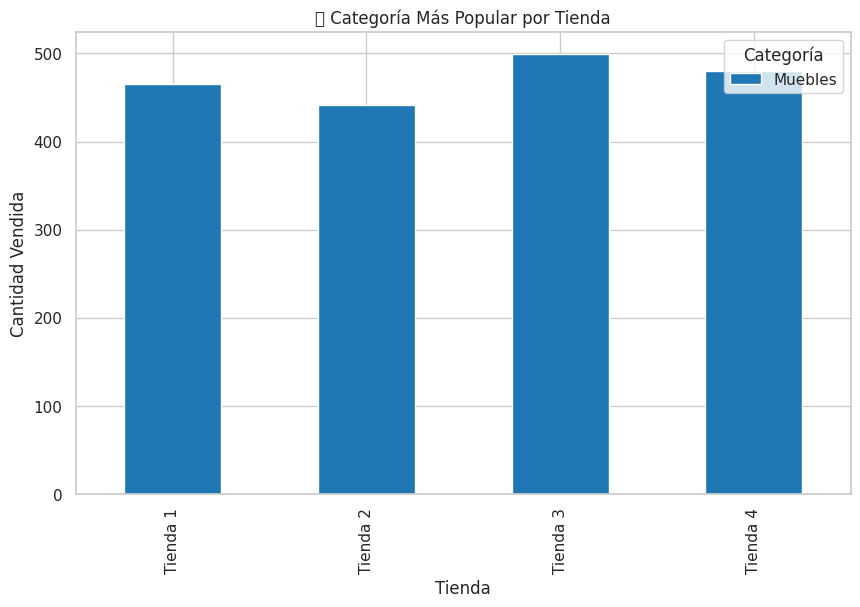

<ipython-input-28-05649d46c5a1>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=envio, x="Lugar de Compra", y="Costo de Envío Promedio", palette="rocket")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


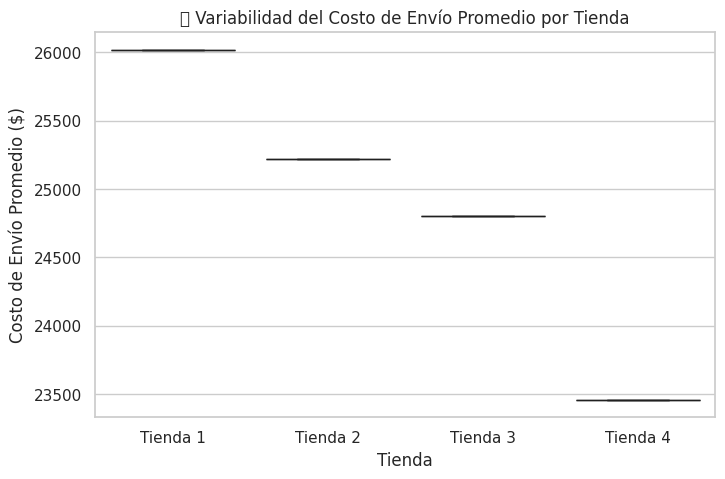

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


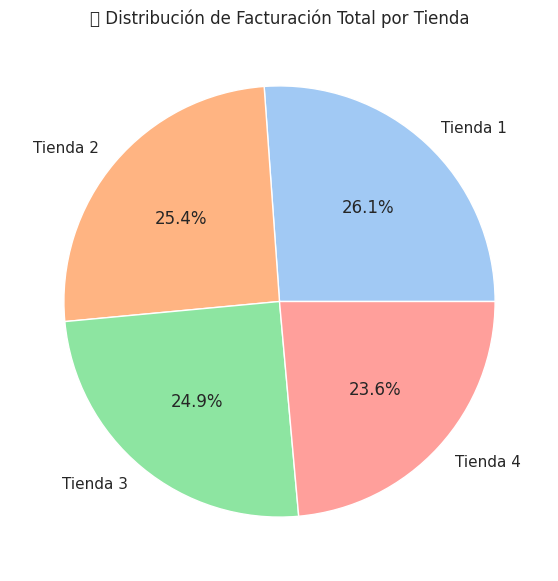

In [28]:
# Simulación de los datos procesados
ingresos = pd.DataFrame({
    'Lugar de Compra': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [1.15088e9, 1.116344e9, 1.09802e9, 1.038376e9]
})

envio = pd.DataFrame({
    'Lugar de Compra': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [26018.60, 25216.23, 24805.68, 23459.45]
})

categorias = pd.DataFrame({
    'Lugar de Compra': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Categoría del Producto': ['Muebles', 'Muebles', 'Muebles', 'Muebles'],
    'Cantidad Vendida': [465, 442, 499, 480]
})

sns.set(style="whitegrid")

# --- 1️⃣ Gráfico de barras apiladas: Categorías más populares ---
plt.figure(figsize=(10, 6))
ventas_pivot = categorias.pivot(index="Lugar de Compra", columns="Categoría del Producto", values="Cantidad Vendida")
ventas_pivot.plot(kind="bar", stacked=True, colormap="tab10", figsize=(10, 6))
plt.title("📦 Categoría Más Popular por Tienda")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.legend(title="Categoría")
plt.show()

# --- 2️⃣ Gráfico de caja y bigotes: Costo de envío promedio ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=envio, x="Lugar de Compra", y="Costo de Envío Promedio", palette="rocket")
plt.title("🚚 Variabilidad del Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío Promedio ($)")
plt.xlabel("Tienda")
plt.show()

# --- 3️⃣ Gráfico de pastel: Facturación total por tienda ---
plt.figure(figsize=(7, 7))
plt.pie(ingresos['Ingreso Total'], labels=ingresos['Lugar de Compra'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("💰 Distribución de Facturación Total por Tienda")
plt.show()

# 7. Informe final

## Informe de análisis para la venta de tienda

### Introducción
El presente informe tiene como objetivo determinar cuál tienda debería vender el Sr. Juan, basándose en un análisis detallado de cinco factores clave: facturación total, categorías de productos más y menos vendidas, calificación promedio de clientes, productos con mayor y menor demanda, y costos de envío. A través del estudio de estos aspectos y la interpretación de gráficos generados, se identifican las fortalezas y debilidades de cada tienda para tomar una decisión informada y estratégica.

### Desarrollo del Análisis
1. **Facturación Total por Tienda**:
El análisis de ingresos muestra que la Tienda 1 tiene la mayor facturación, seguida por la Tienda 2, mientras que Tienda 4 tiene el menor rendimiento financiero. La distribución de ingresos sugiere que Tienda 1 y Tienda 2 son las opciones más sólidas en términos de rentabilidad.
> <img src="https://drive.google.com/uc?id=12RiluPST5nyDq4uC1zXiOLCyhXyIhJt8" width="350" height="300">

2. **Categorías de Productos más y menos vendidas**
Las categorías más vendidas en todas las tiendas son Muebles, lo que indica una demanda constante de este tipo de productos. Esto es una ventaja para la tienda que se venda, ya que sus compradores podrían estar interesados en adquirir un negocio con un segmento de mercado consolidado. No obstante, si el Sr. Juan busca diversificación, la tienda con mayor variedad de ventas sería la más atractiva.
> <img src="https://drive.google.com/uc?id=18v0RH-7fHEWWdwZjG_K3hSY_pvJItJzw" width="350" height="300">

3. **Calificación Promedio de Clientes**
Las evaluaciones de los clientes reflejan una ligera ventaja para Tienda 3, con la mejor calificación promedio, seguida de Tienda 2. Una calificación alta indica satisfacción del cliente y puede representar una ventaja competitiva en la venta de la tienda.

4. **Productos más y menos vendidos**
Los productos más vendidos incluyen Armario (Tienda 1), Kit de bancas (Tienda 3) y Cama box (Tienda 4). En cambio, los menos vendidos incluyen Auriculares con micrófono (Tienda 1) y Bloques de construcción (Tienda 3). La tienda que tenga mayor concentración de productos con ventas sólidas puede ser más atractiva para los compradores.

5. **Coste Promedio del Envío**
Los costos de envío más bajos están en Tienda 4, lo que podría ser una ventaja para compradores interesados en reducir gastos operativos. Sin embargo, esta tienda también es la que presenta menor facturación, lo que podría indicar menos volumen de ventas.
> <img src="https://drive.google.com/uc?id=1g8CNGbD2pbU960s1aiPUoU6l9VKA0IAN" width="350" height="300">

### Conclusión y Recomendación
Basándose en los factores analizados, la mejor opción para vender es Tienda 4. Aunque tiene el ingreso más bajo, es la que ofrece menores costos de envío, lo que puede representar una ventaja operativa para el comprador. Además, esta tienda puede ser más fácil de vender debido a su menor tamaño y menor inversión necesaria.

Si el Sr. Juan busca maximizar ganancias en la venta, podría intentar vender Tienda 1, que tiene la mayor facturación y productos con fuerte demanda. No obstante, la competencia en esta tienda es alta y sus costos de envío son elevados, lo que podría hacer que la venta requiera mayor negociación.

Finalmente, la decisión dependerá del tipo de comprador y de los objetivos del Sr. Juan: si busca una venta rápida y accesible, Tienda 4 es ideal; si prefiere una venta más rentable, Tienda 1 es la opción adecuada.

Este análisis proporciona una visión clara sobre cuál tienda debería vender, considerando aspectos financieros, operativos y comerciales. La decisión final dependerá de las prioridades y expectativas del Sr. Juan.